<h1 style="font-size:40px;"><center>Exercise I:<br> Backpropagation
</center></h1>

# Introduction

Welcome to the second part of the first lab for Deep Learning!

In this lab we will scratch the surface of pytorch and deep learning. Pytorch is a power tool for data scientists to train neural networks. Pytorch have a lot of features which can be used too train and create custom dataloaders, models and trainers in order to solve most problems related to neural networks.

For this lab all tasks include **TODO's** these are expected to be done before the deadline. At the end of the lab some questions shall be answered and what you have learned during the lab.

There is a file called config.py. This file contains most of the settings that is used during the lab. We wont use every setting at all time but the config help us to keep organised.

---

# Lab 1

The following code allows us to edit imported files without restarting the kernel for the notebook

In [1]:
%load_ext autoreload
%autoreload 2
# Hacky solution to access the global utils package
import sys,os
sys.path.append(os.path.dirname(os.path.realpath('..')))

In [2]:
# local modules
from config import flying_objects_config
from sklearn.datasets import load_digits
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Torch packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

## Load config

In [3]:
cfg = flying_objects_config()

## Define neural network

In order to create a neural network model we need to implement the following class which inherits nn.Module. 

The first example is a single perceptron with relu as activation function. Relu replaces the heaviside step function in order to make progress in the weight updates.

If we assume that the trainer uses CrossEntropyLoss from pytorch we do not need to define an activation function before the output since CrossEntropyLoss combines nn.LogSoftmax() and nn.NLLLoss() according to the pytorch documentation.

In [4]:
# Example 1
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(1,1)
        self.relu = nn.ReLU() 
        
    def forward(self, x):
        x = x.view(x.size(0), -1) # Flatten
        output = self.fc(x)
        output = self.relu(x)
        return output

The second example is a network model which have 1 hidden layer. We can add additional hidden layers if we want. This is known as a deep/multilayer feedforward model or multilayer perceptron model (MLP)

In [5]:
# Example 2
class MLP(nn.Module):
    def __init__(self, input_size, output_size,hidden_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(x.size(0), -1) # Flatten
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        return output

## Load dataset

In [6]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torchvision.transforms.Normalize((0.5, ), (0.5, ))])

trainset = torchvision.datasets.MNIST(root='../data', 
                                        train=True,
                                        download=True,
                                        transform=transform)

testset = torchvision.datasets.MNIST(root='../data', 
                                        train=False, 
                                        download=True, 
                                        transform=transform)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=2)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size=100,
                                         shuffle=False,
                                         num_workers=2)

/home/stud/f/fremar16/miniconda3/envs/DL-Labs/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Plot a batch from dataset

In order to visualise the dataset we will use the function plot_grid_of_batch in order to plot the data of a batch. 

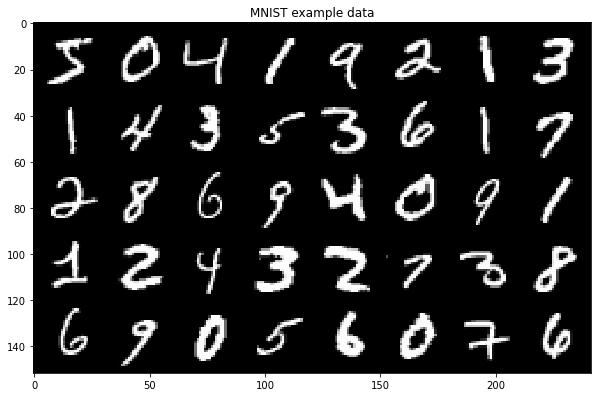

In [7]:
sample_index = 40
plt.figure(figsize=(10,10))
plt.imshow(torchvision.utils.make_grid(trainset.data[:sample_index].unsqueeze(1).float(), normalize=True).permute(1,2,0),cmap=plt.cm.gray_r,interpolation='nearest')
plt.title("MNIST example data");

## Learning framework

In this section we will learn to predict with the help of our network. The approach consist of two parts; a training and a validation step.

Training consist of 4 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function
3. Compute the gradients for every parameter (backpropagation) 
4. Update the parameters

Validation consist of 2 stages:
1. Compute model's predictions (forward pass)
2. Compute the loss, using predictions, labels and a appropriate loss function

## Tasks

The following tasks will be done on the Training class below.

**TODO:** Implement;
1. [ ] Criterion (loss)
2. [ ] Optimizer

**TODO:**
1. [ ] Implement training step.

In [8]:
model = MLP(cfg.IMAGE_CHANNEL, cfg.NUM_CLASS, 10)# TODO
criterion = nn.CrossEntropyLoss()# TODO
optimizer = torch.optim.Adam(model.parameters())#TODO

In [9]:
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(trainloader, 0):
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i+1}] loss: {running_loss / 100:.2}', end='\r')
            running_loss = 0.0


RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x784 and 3x10)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
outputs = model(images)
_, predicted = torch.max(outputs, 1)

In [ ]:
n_test = 10
df_result = pd.DataFrame({
    'Ground Truth': labels[:n_test],
    'Predicted label': predicted[:n_test]})
display(df_result.T)
imshow(torchvision.utils.make_grid(images[:n_test, :, :, :], nrow=n_test))

## Run training

In [ ]:
# Start training
#model = Net(channels=cfg.IMAGE_CHANNEL, num_classes=cfg.NUM_CLASS)
model = MLP(3*128*128, cfg.NUM_CLASS, 2)
trainer = Training(model)
trainer.fit(dataset.train_dataloader(), dataset.validation_dataloader())

## Task 5
Extend Feedforward with additional hidden nodes until we see that the loss is going down.

Note: In order to test the model the training model needs to be implemented!

## Task 6
How did the modified Feedforward network perform? 
In this task increase the depht (more layers) of the Feedforward network instead of the size of the hidden layer.

Note: In order to test the model the training model needs to be implemented!

# The report!


## Name

## Introduction

## Questions

1. How did the training time change when moving to GPU?
2. What would happen if we remove the activation function from the Perceptron model? 
3. What is the purpose of the activation functions after each hidden layer?
4. What was the reason behind the choice of optimization and loss function?

## Summary 